# EDA on *'Algerian Forest Fires'* data set


* The data set comprises of the study on Forest fires that occured in two regions of Algeria, namely the 'Bejaia region'  and the 'Sidi Bel-abbes region' during the period of june to september in year 2012.


* In this dataset we have data observations of *'Meteorological conditions'* and  *'Fire Weather Index(FWI) components'* that influence the forest fires.


    * Meteorological conditions include:
        Temperature : temperature noon (temperature max) in Celsius degrees: 22 to 42
        RH : Relative Humidity in %: 21 to 90
        Ws :Wind speed in km/h: 6 to 29
        Rain: total day in mm/m2: 0 to 16.8
    
    * Fire Weather Index(FWI) components include:
        Fine Fuel Moisture Code (FFMC) influences 'ignition and fire spread'.
        Duff Moisture Code (DMC), Drought Code (DC) affects 'fire intensity'.
        Initial Spread Index (ISI) is a score that correlates with 'fire velocity spread' 
        Buildup Index (BUI) represents the amount of 'available fuel'. 
    
    * In total The Fire Weather Index(FWI) is an indicator of 'fire intensity'.
    
* By performing EDA on the dataset, we will study how the above factors contibuted to forest fires, which helps in drawing conclusions for future predictions.

* Dataset: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

In [1]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Reading forest fire csv Data set as alias ff
ff = pd.read_csv(r'file:///E:\Users\Raviteja\Downloads\Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [3]:
# using head() function to show top 05 rows
ff.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
#Dropping rows which have no information

#dropping rows having region name and headers

ff.drop(index=[122,123], inplace=True) # droping row 122,123 from dataset
ff.reset_index(inplace=True)
ff.drop('index', axis=1, inplace=True)


In [5]:
### creating feature called Region 0 for Bejaia region and 1 for Sidi Bel-abbes region
ff.loc[:122,'Region']=0
ff.loc[122:, 'Region']=1


In [6]:
# To check shape of data set i.e., No. of rows and No. of columns in Data set.

ff.shape

(244, 15)

In [7]:
# TO check basic info of data set

ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [8]:
# columns names from data set
ff.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [9]:
# here it is visible that some columns have spaces in the names like RH, Ws
# stripping spaces from column names
ff.columns = [fea.strip() for fea in ff.columns]
ff.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
### converting all feature values to string so that we can do data cleaning as shown below.
ff=ff.astype(str)

### somes values in colums also have space
for feature in ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    ff[feature]= ff[feature].str.replace(" ","")

In [11]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [12]:
### index no 165 for feature name FWI has value fire
ff[ff['FWI']== 'fire'].index

Int64Index([165], dtype='int64')

In [13]:
### replacing fire value witha float value
ff.loc[165,'FWI']=' 0.1'

In [14]:
### changing datatypes of features to numerical for numerical features as all are in object

ff['day']=ff['day'].astype(int)
ff['month']=ff['month'].astype(int)
ff['year']=ff['year'].astype(int)
ff['Temperature']=ff['Temperature'].astype(int)
ff['RH']=ff['RH'].astype(int)
ff['Rain']=ff['Rain'].astype(float)
ff['FFMC']=ff['FFMC'].astype(float)
ff['DMC']=ff['DMC'].astype(float)
ff['BUI']=ff['BUI'].astype(float)
ff['ISI']=ff['ISI'].astype(float)
ff['Ws']=ff['Ws'].astype(float)
ff['DC']=ff['DC'].astype(float)
ff['FWI']=ff['FWI'].astype(float)


ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(8), int32(5), object(2)
memory usage: 24.0+ KB


In [15]:
#checking null values
ff.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
#checking column classes

ff['Classes'].value_counts()


fire       137
notfire    106
nan          1
Name: Classes, dtype: int64

In [17]:
# Stripping the Classes Features data

ff.Classes = ff.Classes.str.strip()
ff['Classes'].value_counts()

fire       137
notfire    106
nan          1
Name: Classes, dtype: int64

In [18]:
### replacing nan value wit fire to make data equal to the info given in dataset 
ff[ff['Classes']== 'nan'].index
ff.loc[165,'Classes']='fire'

In [19]:
#checking null values 
ff['Classes'].isnull().sum()

0

In [20]:
### Getting uniques values in each features

ff.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

In [21]:
ff.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0.0
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0.0


## Analysing Meteorological conditions

In [22]:
#statistical data of meterological features
ff_met = ff[['Temperature', 'RH', 'Ws', 'Rain']]
ff_met.describe()

,Temperature,RH,Ws,Rain
count,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656
std,3.633843,14.884200,2.810178,1.999406
min,22.000000,21.000000,6.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000
75%,35.000000,73.250000,17.000000,0.500000
max,42.000000,90.000000,29.000000,16.800000


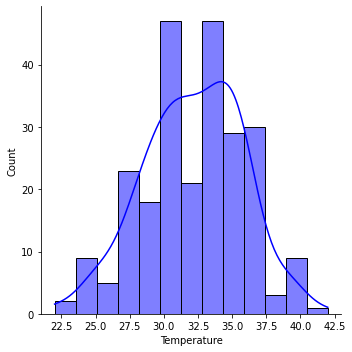

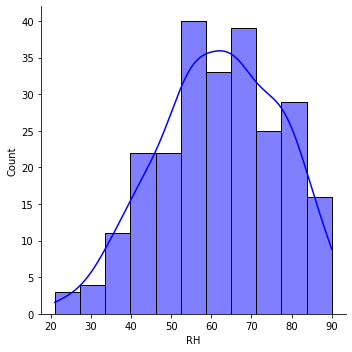

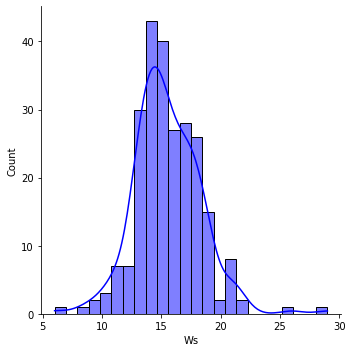

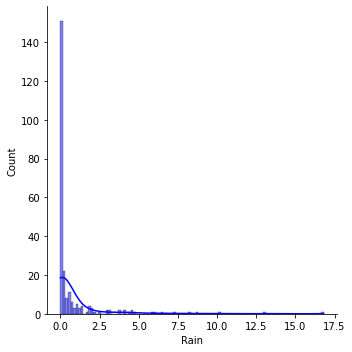

In [23]:
#Graphical representation of Meterological data

for feature in ff_met:
    sns.displot(data=ff_met, x=feature, kde=True, color='blue')
    plt.show()

###  Weather data observations:


* Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
* RH : Relative Humidity in %: 21 to 90
* Ws :Wind speed in km/h: 6 to 29
* Rain: total day in mm: 0 to 16.8

In [24]:
#finding correlation between meterological features
ff_met.corr()


,Temperature,RH,Ws,Rain
Temperature,1.000000,-0.654443,-0.278132,-0.326786
RH,-0.654443,1.000000,0.236084,0.222968
Ws,-0.278132,0.236084,1.000000,0.170169
Rain,-0.326786,0.222968,0.170169,1.000000


<AxesSubplot:>

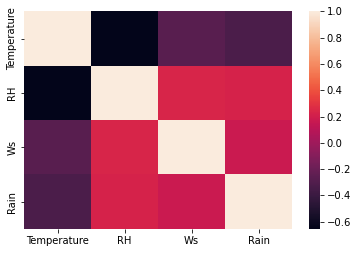

In [25]:
sns.heatmap(ff_met.corr())

### Obseravtion:

* Tempatarue is inversly correlated with RH, Ws, Rain. 
* Rain is positively correlated with RH, Ws.

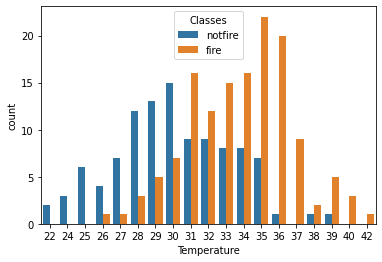

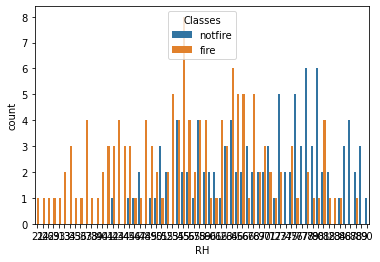

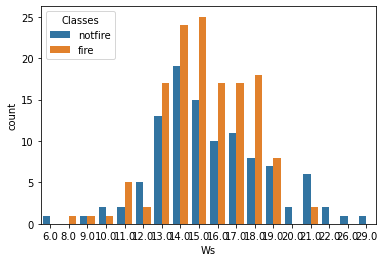

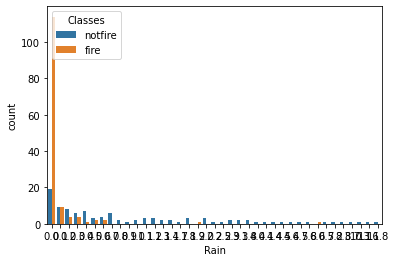

In [26]:
#understanding meterological features effect on fire
### for this we plot count plot

for feature in ff_met:
    sns.countplot(data=ff, x=feature, hue='Classes')
    plt.show()

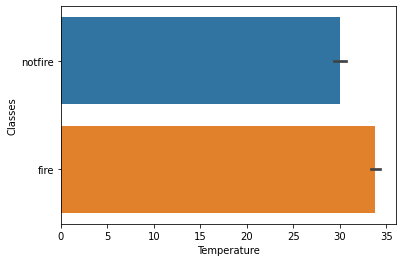

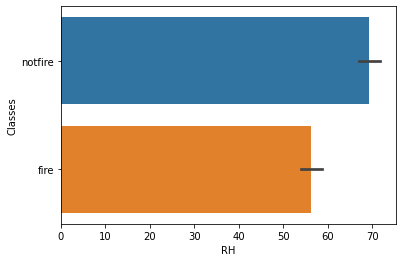

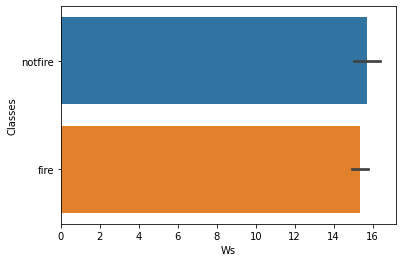

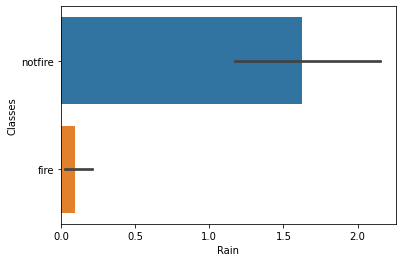

In [27]:
#understanding meterological features effect on fire
### for this we plot BAR plot
for feature in ff_met:
    sns.barplot(data=ff, x=feature, y=ff.Classes)
    plt.show()

### Observation:

* Meterological factors have significant effect on fires.

    1.1 Fires were high at higher temparatures
    
    1.2 Fires were low at higher RH values
    
    1.3 wind speed has mixed affect on fires
    
    1.4 Fires are very low at higher Rain values

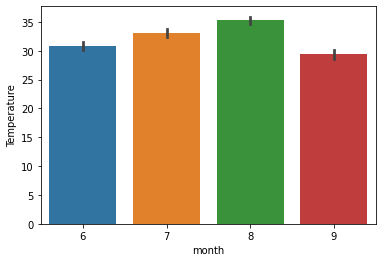

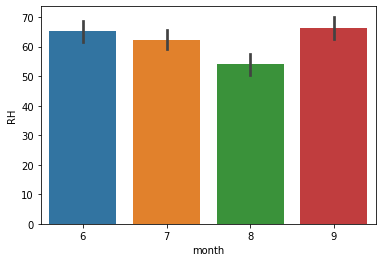

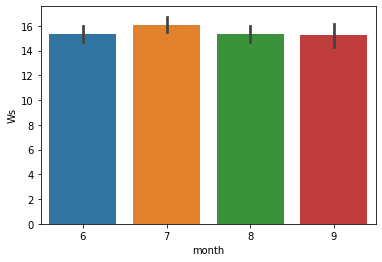

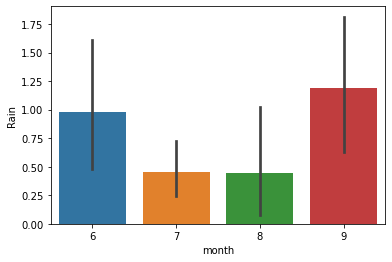

In [28]:
#understanding meterological conditions in different months
### for this we plot BAR plot
for feature in ff_met:
    sns.barplot(data=ff, x=ff.month, y=feature)
    plt.show()

### Observation:
* Temparature was high in 8th month whearas  RH, Rainfall Was high in 6th and 9th months

## Analysing Fire Weather Index(FWI) components

In [29]:
#statistical data of Fire Weather Index(FWI) components
ff_fwi = ff[['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]

ff_fwi.describe()

,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,77.887705,14.673361,49.288484,4.774180,16.664754,7.006967
std,14.337571,12.368039,47.619393,4.175318,14.204824,7.438505
min,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


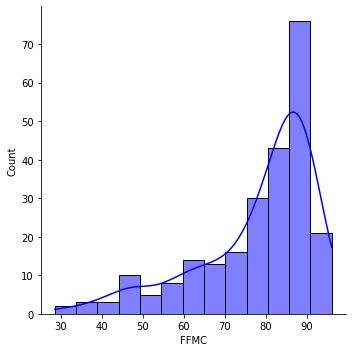

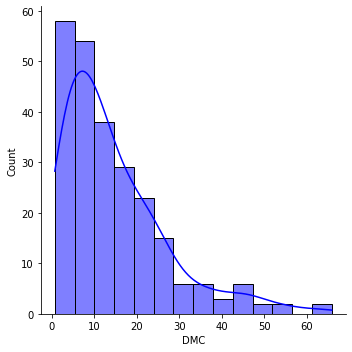

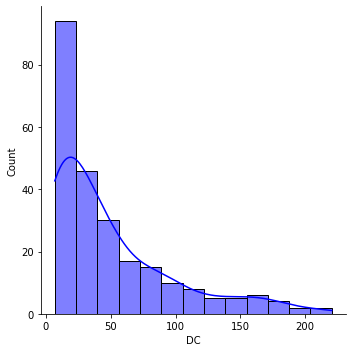

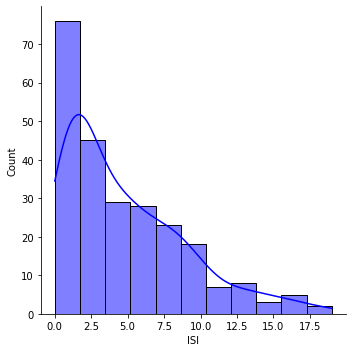

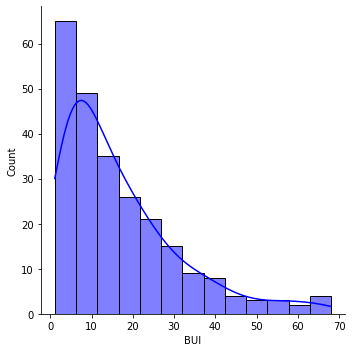

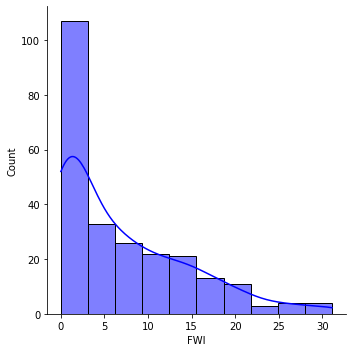

In [30]:
#Graphical representation of Meterological data

for feature in ff_fwi:
    sns.displot(data=ff_fwi, x=feature, kde=True, color='blue')
    plt.show()

###  FWI Components observations:

* Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
* Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
* Drought Code (DC) index from the FWI system: 7 to 220.4
* Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
* Buildup Index (BUI) index from the FWI system: 1.1 to 68
* Fire Weather Index (FWI) Index: 0 to 31.1

In [31]:
#finding correlation between FWI features
ff_fwi.corr()

,FFMC,DMC,DC,ISI,BUI,FWI
FFMC,1.000000,0.602391,0.503919,0.739730,0.589652,0.686111
DMC,0.602391,1.000000,0.875362,0.674499,0.982073,0.874816
DC,0.503919,0.875362,1.000000,0.498926,0.941906,0.740184
ISI,0.739730,0.674499,0.498926,1.000000,0.635891,0.907610
BUI,0.589652,0.982073,0.941906,0.635891,1.000000,0.857791
FWI,0.686111,0.874816,0.740184,0.907610,0.857791,1.000000


<AxesSubplot:>

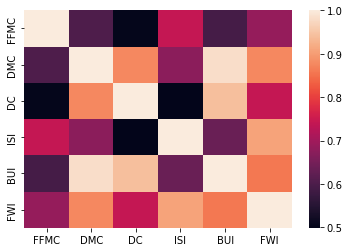

In [32]:
sns.heatmap(ff_fwi.corr())

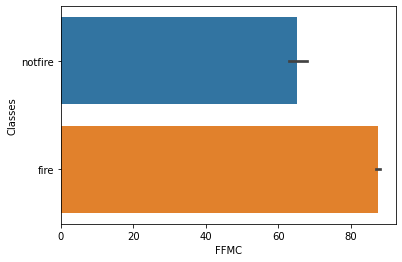

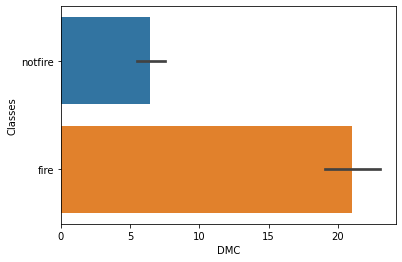

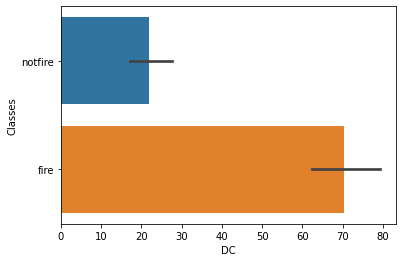

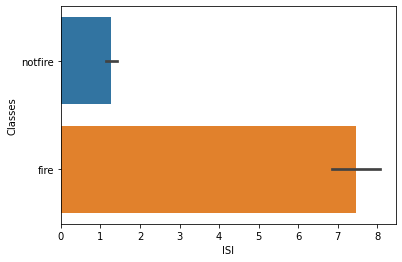

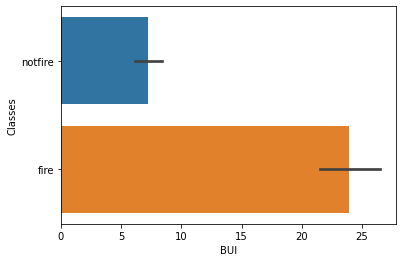

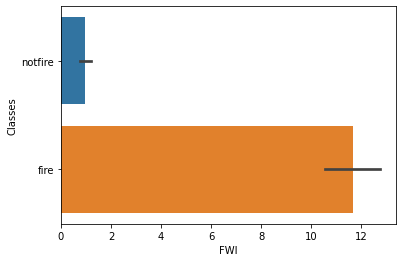

In [33]:
#understanding fwi features effect on fire
### for this we plot BAR plot
for feature in ff_fwi:
    sns.barplot(data=ff, x=feature, y=ff.Classes)
    plt.show()

### Observation:
* Higher FWI component values contributed to fires.

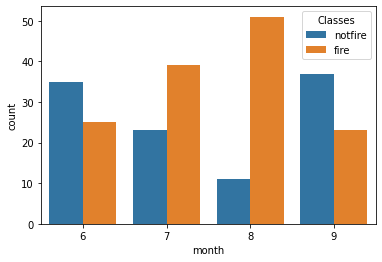

In [34]:
#EFFECT OF FIRE IN MOTNTHS
sns.countplot(data=ff, x=ff.month, hue='Classes')
plt.show()

### Observation: 

Most no of cases of fire occured are in the month of august and least no of cases of fire occured is in month of september.

<AxesSubplot:xlabel='Region', ylabel='count'>

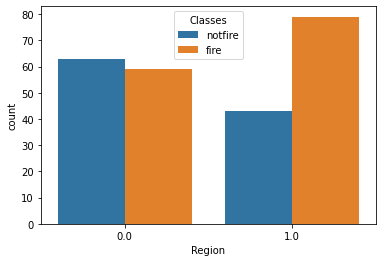

In [35]:
#comparision of region and fire 
sns.countplot(data=ff, x='Region', hue='Classes')

### Observation: 

It is evident that Sidi Bel-abbes region has more occurance of fire than Bejaia region.

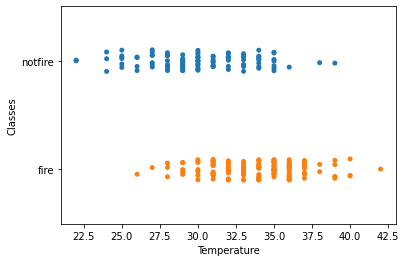

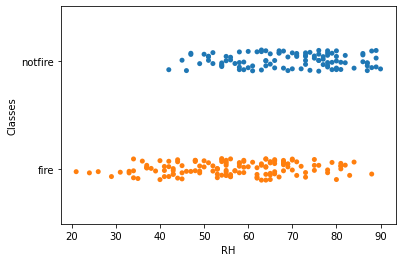

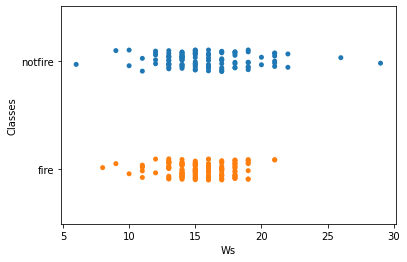

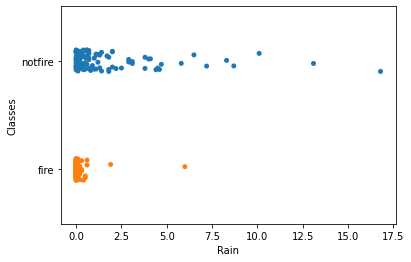

In [36]:
for feature in ff_met:
    sns.stripplot(data=ff, x=feature, y='Classes')
    plt.show()

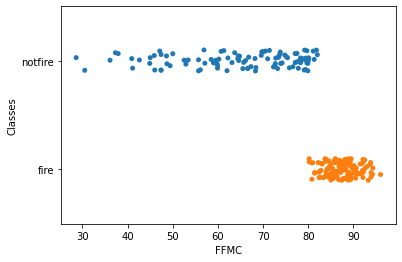

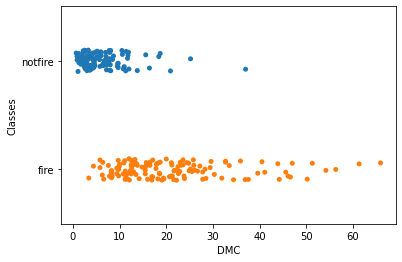

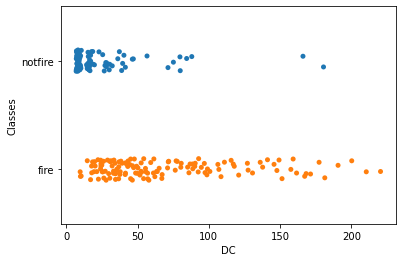

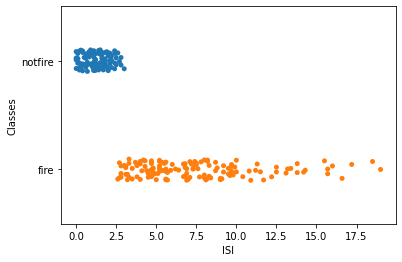

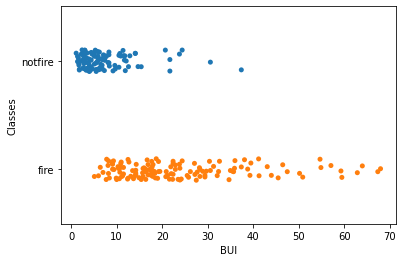

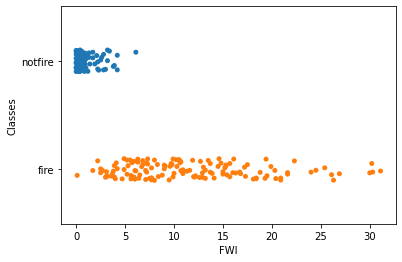

In [37]:
for feature in ff_fwi:
    sns.stripplot(data=ff, x=feature, y='Classes')
    plt.show()

### Observation:

* Temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.

* Wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.

* Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.

* For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.

* DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.

* In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.

* In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.

* Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.

* Most no of cases of fire occured are in the month of august and least no of cases of fire occured is in month of september.
 
* July and august have more cases of fire as compared to no fire.

* June and september have more cases of no fire as compared to fire.